# Njabulo Dlamini

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('..')
from analysis.code import project_functionsNjabulo as pt
from analysis.code import project_functionsAidan as pt1

## Research question/interests

Briefly describe your research question or interests here

Which country had the largest increase in gdp per capita over a specific timeframe?

I believe this is important as we can determine the relationship between a country's economic prosperity and its emissions per capita to determine if a country's economic success is dependent on its dependence on fossil fuels. Although it's probable that there is directly proportional relationship between a country's gdp per capita and its emissions, it would be interesting to see if there are any countries that are able to economically successful while still having relatively low emissions. This could allow for further investigation into what allows these countries to maintain this balance and perhaps lay the foundations that other countries can follow.


In [26]:
def top16_countries1():
   
    mydf16 = (pd.read_csv("../data/raw/owid_emissions.csv")
              .query('year >= 1980')
              .iloc[:, [0, 1, 3, 4, 7, 9]]
              .reset_index(drop=True)
              .assign(Emissions_per_capita=lambda x: x['co2'] * 1000000 / x['population'])
              .assign(GDP_per_capita = lambda x: x['gdp']/x['population'])
              .reset_index(drop=True))
    return mydf16


In [27]:
df = top16_countries1()
 
df_meanEmissions = df.groupby('country')['Emissions_per_capita'].mean()
df_meanGDP = df.groupby('country')['GDP_per_capita'].mean()
df1 = pd.DataFrame(df_meanEmissions)
df2 = pd.DataFrame(df_meanGDP)
df_merged1 = df1.merge(df2, on='country')

df_merged1

,Emissions_per_capita,GDP_per_capita
country,,
Afghanistan,0.194155,1290.943877
Africa,1.105319,NaN
Africa (GCP),NaN,NaN
Aland Islands,NaN,NaN
Albania,1.571646,5966.018977
...,...,...
Western Sahara,NaN,NaN
World,4.401901,11633.718912
Yemen,0.693311,3788.574131


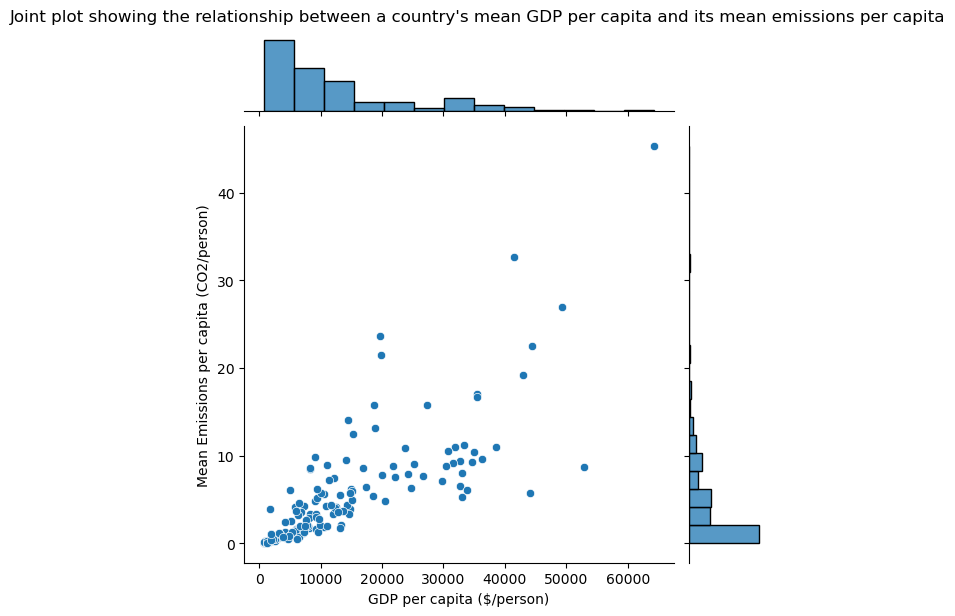

In [34]:
rel = sns.jointplot(data=df_merged1, x="GDP_per_capita", y="Emissions_per_capita")
rel.set_axis_labels(xlabel="GDP per capita ($/person)", ylabel = "Mean Emissions per capita (CO2/person)")
rel.fig.suptitle("Joint plot showing the relationship between a country's mean GDP per capita and its mean emissions per capita", y = 1.02)
rel


First of all we can see on this jointplot that there is a directly proportional relationship between a country's GDP per capita and its emissions per capita. This suggests that  in general there is a tradeoff between having relatively low emissions and being economically prosperous which is to be expected. However, further analysis of the plot  shows that there are countries that don't necessarily fall into that mould.

With the following joint plot we can see that there are four particular zones of which we can categorize the countries into:
- Group I: Countries with a low gdp per capita and low emissions per capita.
- Group II: Countries with a relatively low gdp capita and a high emissions per capita.
- Group III: Countries with a relatively high emissions per capita and a high gdp per capita.
- Group IV: Countries with a relatively low emissions per capita and a high gdp per capita.

The plot shows that majority of the countries fall into the Group I category, however, for the sake of this analysis we will now divert our attention to countries that fall in the Group IV category as they appear to to be the countries who have best been able to find the balance between being an economically and environmentally prosperous country.

## Clean up data set
The first step to finding out which countries fall into group 4 is by cleaning the data such that we can see which countries rank highly in terms of GDP per capita. I decided to use a more detailed data set from the International Monetary Fund (IMF) database.

A problem with the data as is because we contain countries that either no longer exist, are represented by entire regions in a redundant manner or have recently been formed (i.e. South Sudan). Furthermore, the data entries are of type string while also has projections for 2024 up until 2027. For that reason I will now be cleaning the data such that only countries that have numerical values from 1980 to 2023 are in the dataset.


In [ ]:


df = pd.read_csv("../data/raw/imf-dm-export-20230228.csv", sep = ";", decimal = ',')
df


,"GDP per capita, current prices(U.S. dollars per capita)",1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,"582,323","586,204","611,268",no data,no data,no data,no data,no data,no data,no data
2,Albania,"728,359","817,734","824,542","815,529","788,332","788,801","855,724","832,245","805,046",...,"5257,714","5345,058","5268,239","6373,3","6369,009","6591,682","6968,694","7470,082","7958,016","8469,507"
3,Algeria,"2268,607","2305,505","2254,328","2316,679","2432,717","2753,697","2698,915","2705,111","2143,742",...,"4118,839","3953,576","3304,865","3659,531","4151,437","4162,176","4242,401","4371,569","4523,644","4637,342"
4,Andorra,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,"42229,903","40688,491","36973,845","41873,06","40722,63","40643,312","41732,561","42833,362","43788,262","44630,354"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Other advanced economies,"6886,485","6930,571","6792,923","6699,744","6948,341","6861,781","8292,104","10106,092","11787,179",...,"44142,03","43022,85","42555,028","48965,722","49580,11","51398,605","53529,015","55708,932","57993,545","60331,76"
227,Sub-Saharan Africa,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,"1760,388","1727,391","1591,065","1746,345","1849,62","1933,069","2043,649","2160,323","2287,835","2421,53"
228,World,"2862,333","2876,22","2772,215","2797,085","2846,673","2920,23","3376,821","3820,734","4222,994",...,"11489,302","11558,645","11155,514","12616,281","13396,102","13923,716","14522,871","15149,837","15810,007","16490,798"
229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
def gdpWrangle():
    df = pd.read_csv("../data/raw/imf-dm-export-20230228.csv", sep = ";", decimal = ',')
    mydf = (df.rename(columns={"GDP per capita, current prices(U.S. dollars per capita)": "Country"})
            .drop(['2024', '2025', '2026', '2027'], axis=1)
            .drop(index=df.index[0])
            .drop(index=df.index[197:]) #Filter all the regions and continents out thus leaving countries only in the data frame
            .query('`1980` != "no data"') #Filter all the countries that have no data for 1980 and 2023
            .query('`2023` != "no data"')
            .assign(renamed_1980=lambda x: x['1980'].str.replace(',', '.')) #Float values can't be read with a comma so I replaced it with a decimal points
            .assign(renamed_2023=lambda x: x['2023'].str.replace(',', '.'))
            .assign(change_in_gdp_per_capita=lambda x: x['renamed_2023'].astype(float) - x['renamed_1980'].astype(float)))
    return mydf

In [8]:
gdpWrangle()

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2017,2018,2019,2020,2021,2022,2023,renamed_1980,renamed_2023,change_in_gdp_per_capita
2,Albania,"728,359","817,734","824,542","815,529","788,332","788,801","855,724","832,245","805,046",...,"4525,887","5257,714","5345,058","5268,239","6373,3","6369,009","6591,682",728.359,6591.682,5863.323
3,Algeria,"2268,607","2305,505","2254,328","2316,679","2432,717","2753,697","2698,915","2705,111","2143,742",...,"4079,653","4118,839","3953,576","3304,865","3659,531","4151,437","4162,176",2268.607,4162.176,1893.569
5,Angola,"745,119","679,02","661,52","671,804","693,779","758,525","690,446","769,563","812,794",...,"4300,097","3465,062","2805,261","1873,11","2352,128","3790,704","3997,713",745.119,3997.713,3252.594
6,Antigua and Barbuda,"1920,249","2177,087","2448,585","2752,968","3200,985","3763,974","4617,61","5455,264","6547,259",...,"15686,747","16902,149","17495,76","13997,537","14809,483","16786,939","18264,769",1920.249,18264.769,16344.520
7,Argentina,"8361,209","6671,428","3257,853","3962,735","4374,783","3248,745","3857,027","3909,984","4524,498",...,"14618,327","11786,433","10054,023","8571,937","10616,947","13621,859","13767,102",8361.209,13767.102,5405.893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Uruguay,"4139,894","4588,983","3727,408","2032,97","1920,896","1865,107","2302,543","2864,701","2946,361",...,"18431,369","18338,79","17341,404","15208,006","16735,29","20017,557","20463,909",4139.894,20463.909,16324.015
190,Vanuatu,"1053,849","956,137","930,89","931,689","1111,403","976,747","918,675","989,126","1092,048",...,"3158,901","3256,353","3187,38","3294,916","2970,155","3049,75","3114,428",1053.849,3114.428,2060.579
191,Venezuela,"4671,078","5085,58","5041,589","4883,234","3447,45","3472,186","3488,564","2619,24","3292,792",...,"3806,635","3531,883","2675,272","1608,284","2157,322","3051,738","3266,882",4671.078,3266.882,-1404.196
192,Vietnam,"652,593","318,521","414,347","612,565","1044,409","318,956","705,99","856,91","464,581",...,"2957,899","3201,686","3398,214","3514,365","3717,8","4162,938","4682,834",652.593,4682.834,4030.241


Now we have 136 countries that experienced a change in gdp per capita from 1980 up until 2023. However, this is still a great number of to determine which countries have experienced the most economic growth over this period. Thus I have decided to sort the data by the top 16 countries in terms of change in gdp per capita.

In [37]:
gdpWrangle().to_csv("../data/processed/processedGDPData.csv")

In [38]:
def sortGDP():
    gdpWrangle()
    mydf_sort = gdpWrangle().sort_values(by="change_in_gdp_per_capita",ascending=False).reset_index(drop = True)#Sort the list of countries in descending order by change in gdp per capita
    top16 = mydf_sort.drop(index=mydf_sort.index[16:]) #Take the top 16 countries by change in gdp per capita
    return top16

In [40]:
top16 = sortGDP()

[Text(0.5, 0, 'Change in GDP per capita'),
 Text(0.5, 1.0, 'Change in gdp per capita by country from 1980-2023')]

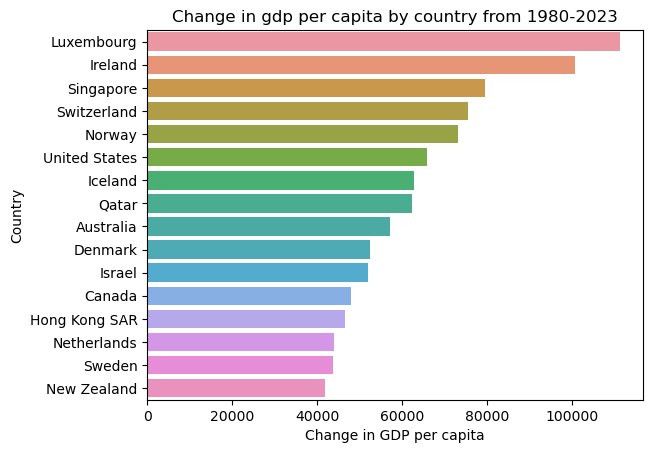

In [42]:
sns.barplot(x = "change_in_gdp_per_capita", y = "Country", data = top16).set(xlabel = "Change in GDP per capita",title="Change in gdp per capita by country from 1980-2023")

Based on the barplot it is apparent that these countries are the top 16 in terms in of GDP per capita. As we can see majority of these countries have a relatively small population (pop.<40 million) bar the US. The top 3 countries (Luxembourg, Ireland,  Singapore) all have notably smaller populations with Luxembourg having a population less than 700,000. Thus, suggesting that population size may be an important factor when considering the economic prosperity of a country.


Now we are going using the emissions dataset and wrangle it such that it gives us the emissions per capita of the those 16 countries.

In [8]:

def top16_countries():
    top15countries = ["Luxembourg", "Ireland", "Singapore", "Switzerland", "Norway", "New Zealand", "Iceland", "Qatar", "Australia", "Denmark", "Israel", "Canada", "Hong Kong", "Netherlands", "Sweden", "United States"]
    mydf16 = (pd.read_csv("../data/raw/owid_emissions.csv")
              .query('year >= 1980')
              .iloc[:, [0, 1, 3, 4, 7, 9]]
              .reset_index(drop=True)
              .query('country in @top15countries')
              .assign(Emissions_per_capita=lambda x: x['co2'] * 1000000 / x['population'])
              .reset_index(drop=True)
              .assign(GDP_per_capita = lambda x: x['gdp']/x['population'])
              .reset_index(drop=True))

    return mydf16


In [22]:
top16_countries()

,country,year,population,gdp,co2,co2_growth_prct,Emissions_per_capita,GDP_per_capita
0,Afghanistan,1980,12486640.0,1.532984e+10,1.756,-21.339,0.140630,1227.699047
1,Afghanistan,1981,11155196.0,1.564534e+10,1.978,12.649,0.177316,1402.516257
2,Afghanistan,1982,10088290.0,1.598041e+10,2.095,5.869,0.207667,1584.055361
3,Afghanistan,1983,9951447.0,1.675533e+10,2.520,20.308,0.253230,1683.708221
4,Afghanistan,1984,10243689.0,1.707215e+10,2.822,11.968,0.275487,1666.602000
...,...,...,...,...,...,...,...,...
10873,Zimbabwe,2017,14751101.0,2.194784e+10,9.596,-8.899,0.650528,1487.877848
10874,Zimbabwe,2018,15052191.0,2.271535e+10,11.795,22.920,0.783607,1509.106089
10875,Zimbabwe,2019,15354606.0,NaN,11.115,-5.772,0.723887,NaN
10876,Zimbabwe,2020,15669663.0,NaN,10.608,-4.559,0.676977,NaN


In [ ]:
mydf16.to_csv("../data/processed/processedEmissionsDataNjabulo.csv")

<matplotlib.legend.Legend>

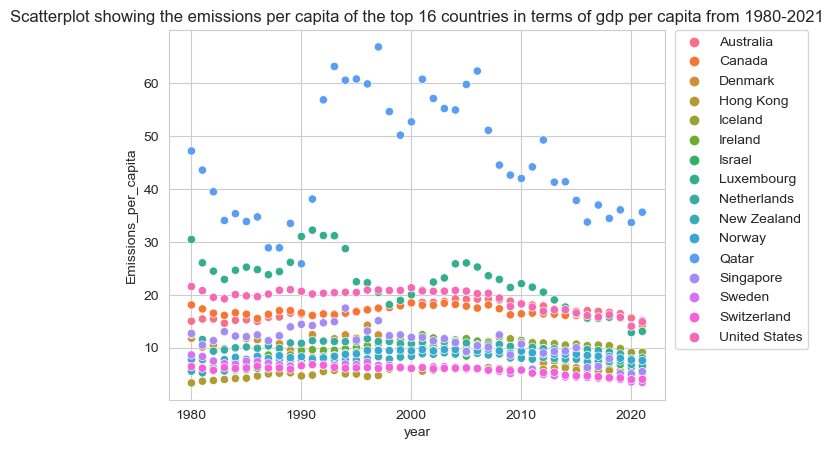

In [ ]:
sns.set_style("whitegrid")
sns.scatterplot( data = mydf16, y = 'Emissions_per_capita', x = 'year', hue = 'country').set(title = "Scatterplot showing the emissions per capita of the top 16 countries in terms of gdp per capita from 1980-2021")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Creating new data frame
The scatter plot fails to give full information so first due to there still being too many countries so I have decided to do some further filtering.

In [9]:
top_df = top16_countries().groupby('country')['Emissions_per_capita'].mean()
topgd =  top16_countries().groupby('country')['GDP_per_capita'].mean()
top_df = pd.DataFrame(top_df)
topgd = pd.DataFrame(topgd)
df_merged = top_df.merge(topgd, on = 'country')
df_merged


,Emissions_per_capita,GDP_per_capita
country,,
Australia,17.019978,35505.671964
Canada,16.713075,35426.048410
Denmark,9.644210,36245.319971
Hong Kong,5.296058,33059.312744
Iceland,9.411353,32647.376752
Ireland,9.309553,34710.989475
Israel,7.931001,24246.501784
Luxembourg,22.524726,44430.035559
Netherlands,10.376964,35016.997779


<seaborn.axisgrid.FacetGrid>

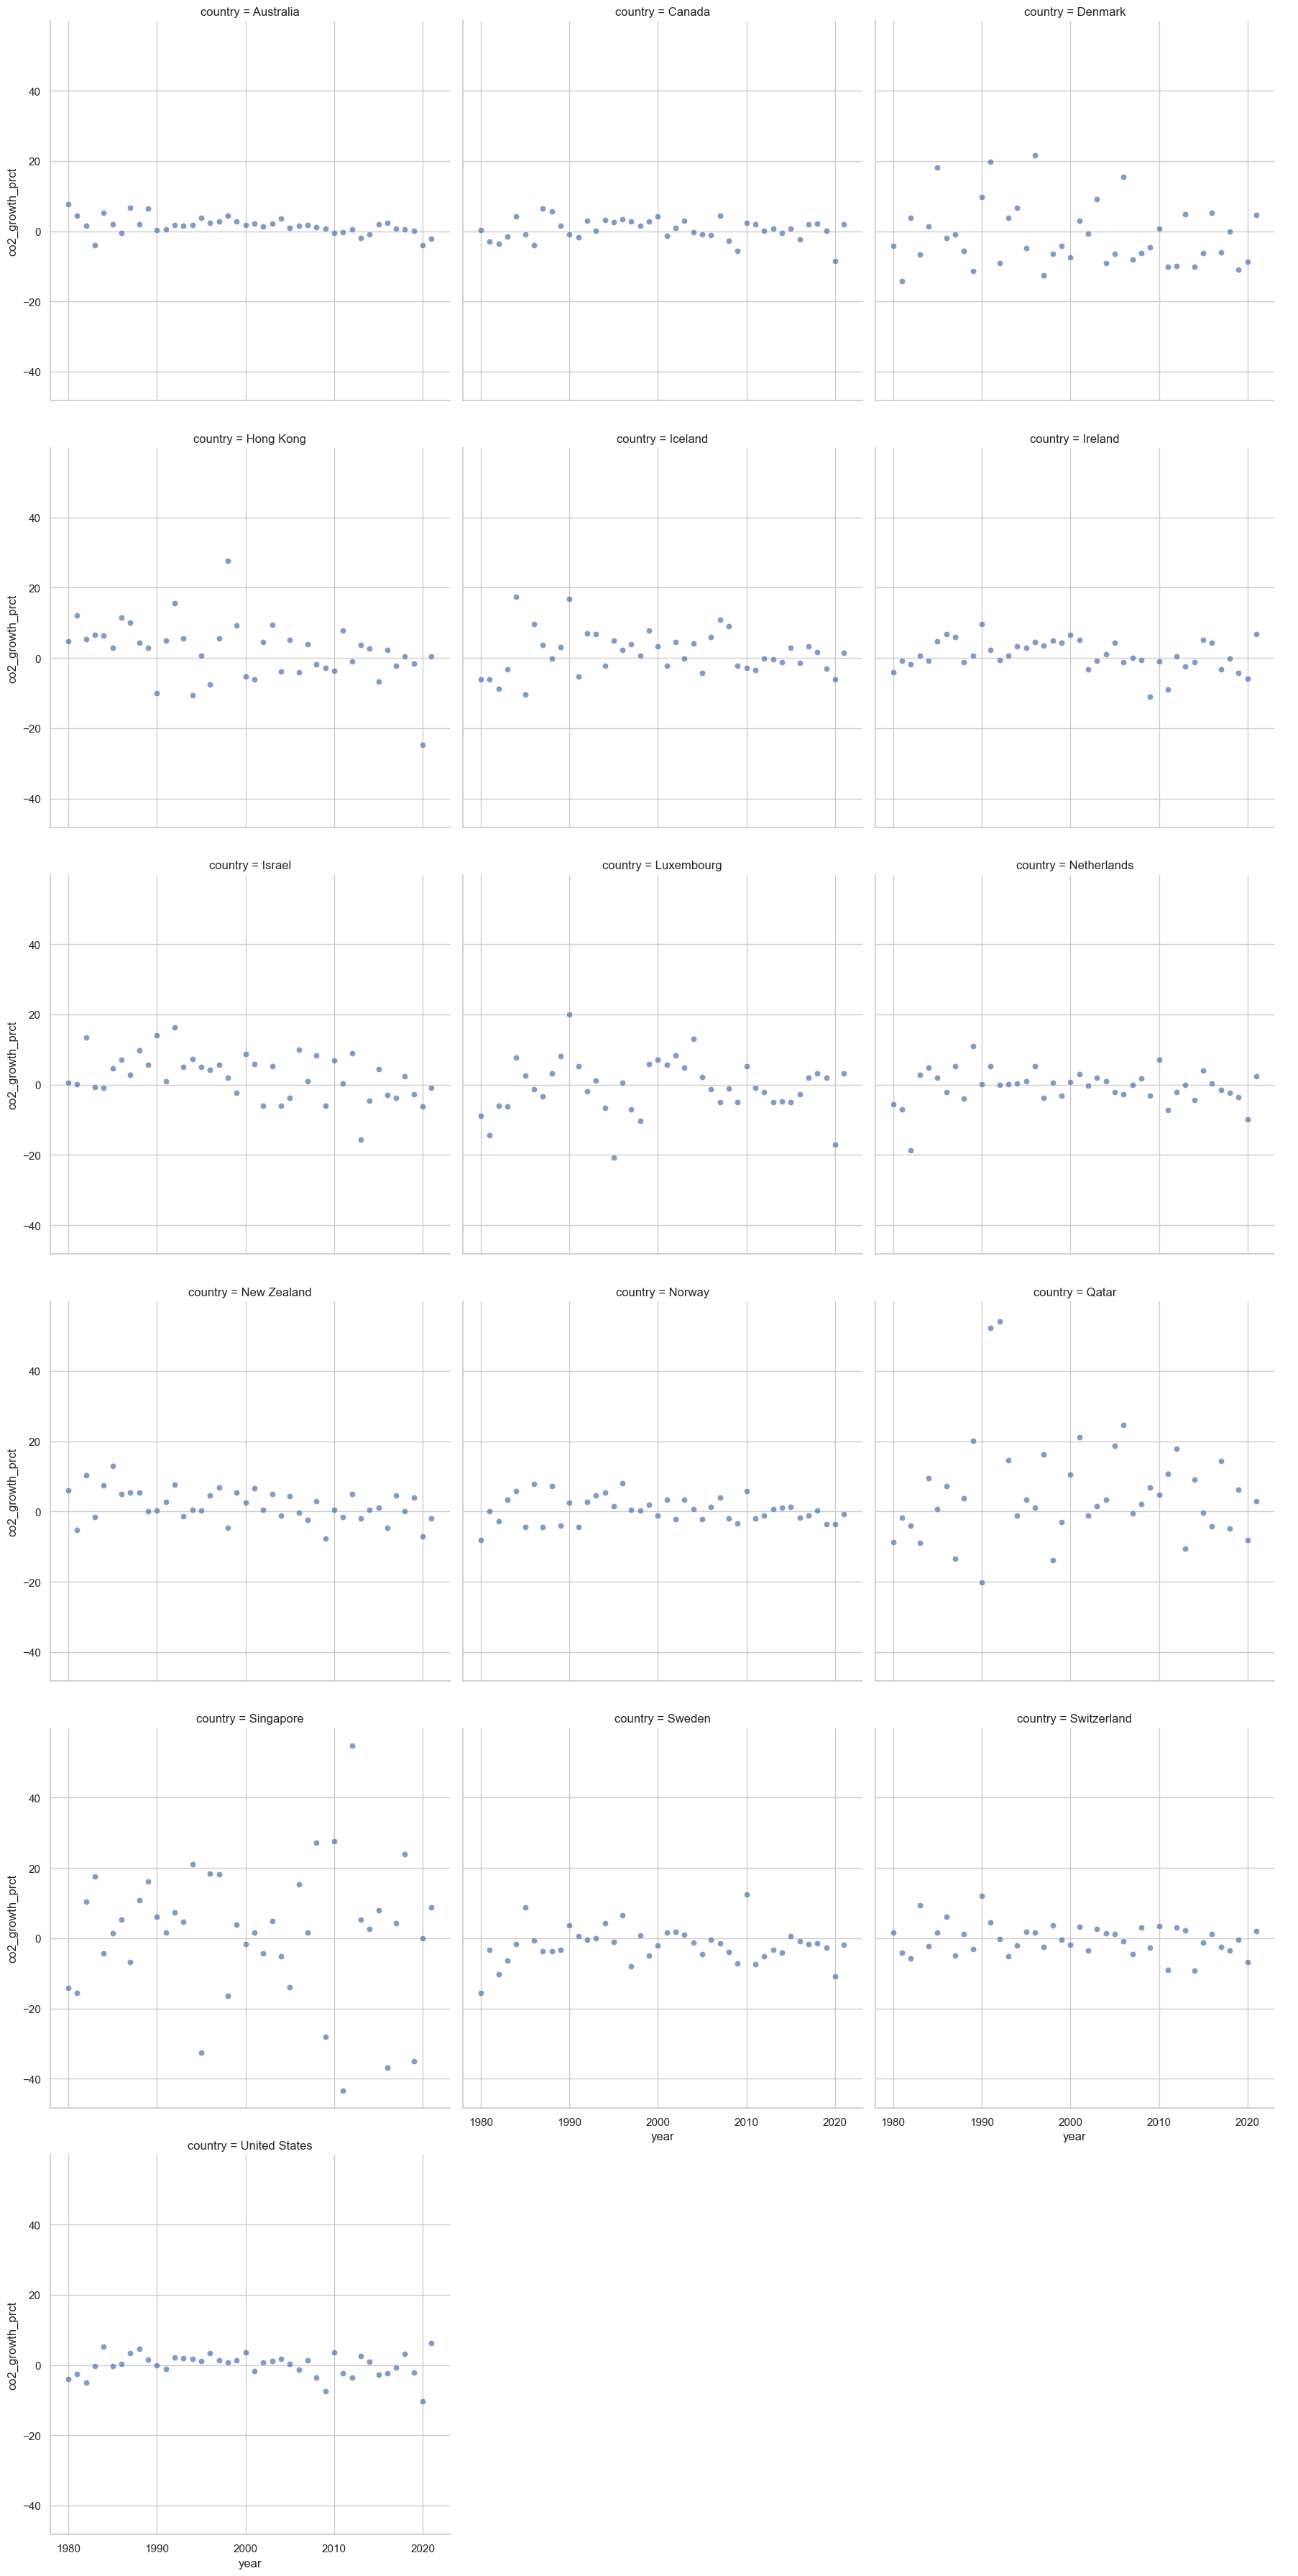

In [ ]:
g = sns.FacetGrid(mydf16, col="country",col_wrap = 3, height = 6, aspect = 1)
g.map(sns.scatterplot, "year", "co2_growth_prct", alpha=.7)
g.add_legend()


As we can see the top 15 countries in terms of gdp per capita have largely tried keeping their emissions growth percentage around zero percent while many have made efforts to shrink their co2 emissions in recent years. However, from this plot we cannot really draw any conclusions as to which countries are able to keep a balance between having an economic prosperity while still being relatively eco-friendly. Furthermore, given the above dataframe it is abundantly clear that the United states has a significantly higher mean CO2 emissions compared to evertone else so I have elected to exclude it from the rest of the analysis.

[Text(0.5, 0, 'Emissions per capita'),
 Text(0, 0.5, 'Country'),
 Text(0.5, 1.0, 'Box plot of the emissions per capita for the top 16 countries')]

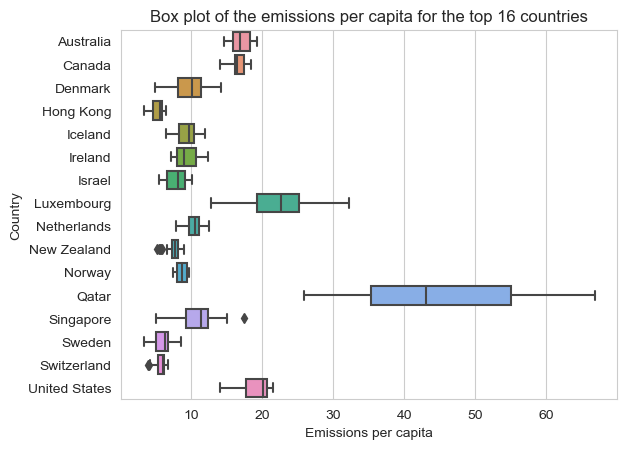

In [ ]:
sns.boxplot(x = 'Emissions_per_capita', y = 'country', data = mydf16).set(xlabel="Emissions per capita", ylabel="Country", title="Box plot of the emissions per capita for the top 16 countries")

As we can see, countries such as Sweden, New Zealand, Israel and Switzerland have significantly large emissions per capita so for we will now be focusing on the rest of the countries to gain a better idea.

In [7]:
topcountries = ["Ireland",  "Iceland", "Canada"]
mydf16 = top16_countries()
mydftop = mydf16[mydf16["country"].isin(topcountries)]

mydftop

,country,year,population,gdp,co2,co2_growth_prct,Emissions_per_capita,GDP_per_capita
42,Canada,1980,24511512.0,6.341136e+11,442.847,0.265,18.066899,25870.032906
43,Canada,1981,24815780.0,6.537744e+11,429.630,-2.985,17.312774,26345.108718
44,Canada,1982,25101514.0,6.338530e+11,414.455,-3.532,16.511155,25251.583842
45,Canada,1983,25360732.0,6.523177e+11,408.339,-1.476,16.101231,25721.563865
46,Canada,1984,25602080.0,6.897335e+11,425.233,4.137,16.609315,26940.525962
...,...,...,...,...,...,...,...,...
247,Ireland,2017,4771860.0,2.905816e+11,39.078,-3.199,8.189260,60894.824603
248,Ireland,2018,4834506.0,3.143217e+11,39.012,-0.168,8.069490,65016.294539
249,Ireland,2019,4896021.0,NaN,37.326,-4.324,7.623742,NaN
250,Ireland,2020,4946123.0,NaN,35.153,-5.820,7.107183,NaN


[Text(0.5, 0, 'Emissions per capita'),
 Text(0.5, 1.0, 'violinplots of the top 3 countries in terms of gdp per capita as well as emissions per capita.')]

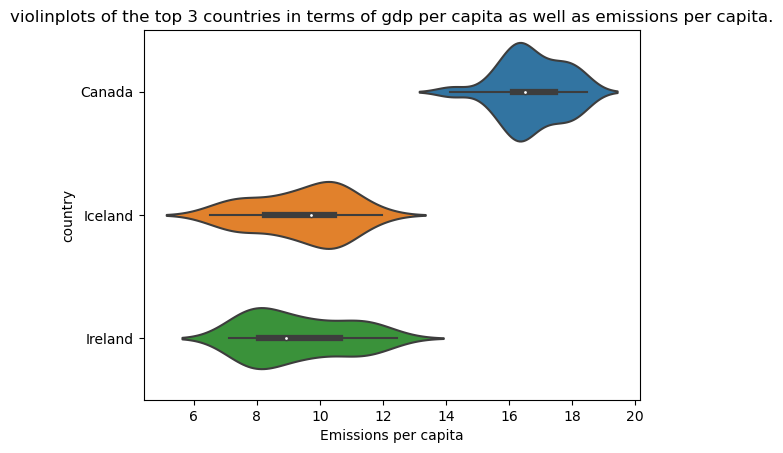

In [10]:
sns.violinplot(x = "Emissions_per_capita", y = 'country', data = mydftop).set(xlabel="Emissions per capita",title='violinplots of the top 3 countries in terms of gdp per capita as well as emissions per capita.')

# Final observations
According to the data these three countries have consistently been among the best when it came to having economic prosperity while having low emissions relative to their population size over the periods of 1980-2021. It would be interesting to see in particular Canada's situation due to their highly industrial economy as to what policies were put in place for it to have such consistently low emissions per capita while being an economic power house in the global economy. All these countries have an industrialized economy however it is worth pointing out that Iceland in particular is the world's largest electricity producer per capita in large part due to its abundance of the geothermal and hydroelectric power sources.